In [1]:
import json
import pandas as pd

# Load JSON files
with open('data/creatures.json') as f:
    creatures = json.load(f)

with open('data/great_old_ones.json') as f:
    great_old_ones = json.load(f)

with open('data/lesser_old_ones.json') as f:
    lesser_old_ones = json.load(f)

with open('data/outer_gods.json') as f:
    outer_gods = json.load(f)

with open('data/races.json') as f:
    races = json.load(f)

# Load CSV file
lovecraft_data = pd.read_csv('data/lovecraft_fiction.csv')


In [2]:
# Extract names from creatures and races
creature_names = [creature['name'] for creature in creatures]
great_old_one_names = [old_one['name'] for old_one in great_old_ones]
lesser_old_one_names = [old_one['name'] for old_one in lesser_old_ones]
outer_god_names = [outer_god['name'] for outer_god in outer_gods]
race_names = [race['race'] for race in races]

# Combine all names into a single list
all_names = creature_names + great_old_one_names + lesser_old_one_names + outer_god_names + race_names


In [3]:
def filter_texts(data_frame, names):
    filtered_texts = []
    for text in data_frame['Text']:  # Change 'text' to 'Text' as per your data
        if any(name.lower() in text.lower() for name in names):
            filtered_texts.append(text)
    return filtered_texts

# Apply the filtering
filtered_texts = filter_texts(lovecraft_data, all_names)


In [4]:
print(filtered_texts[:5])  # Display the first 5 filtered texts


['High up, crowning the grassy summit of a swelling mound whose sides are wooded near the base\r\nwith the gnarled trees of the primeval forest, stands the old chateau of my ancestors. For centuries\r\nits lofty battlements have frowned down upon the wild and rugged countryside about, serving\r\nas a home and stronghold for the proud house whose honoured line is older even than the moss-grown\r\ncastle walls. These ancient turrets, stained by the storms of generations and crumbling under\r\nthe slow yet mighty pressure of time, formed in the ages of feudalism one of the most dreaded\r\nand formidable fortresses in all France. From its machicolated parapets and mounted battlements\r\nBarons, Counts, and even Kings had been defied, yet never had its spacious halls resounded to\r\nthe footsteps of the invader.But since those glorious years all is changed. A poverty but little above the\r\nlevel of dire want, together with a pride of name that forbids its alleviation by the pursuits\r\nof 

In [5]:
from collections import Counter

# Count occurrences of names in the filtered texts
name_counts = Counter()
for text in filtered_texts:
    for name in all_names:
        name_counts[name] += text.lower().count(name.lower())

# Convert to DataFrame for better visualization
name_counts_df = pd.DataFrame(name_counts.items(), columns=['Name', 'Count'])
print(name_counts_df)



                       Name  Count
0            'umr at-tawill      0
1                    abhoth      0
2              apocolothoth      0
3             atlach-natcha      0
4                  azathoth     40
..                      ...    ...
156         spiders of leng      0
157  star spawns of cthulhu      0
158              tcho-tchos      2
159                 voormis      0
160             yaddithians      0

[161 rows x 2 columns]


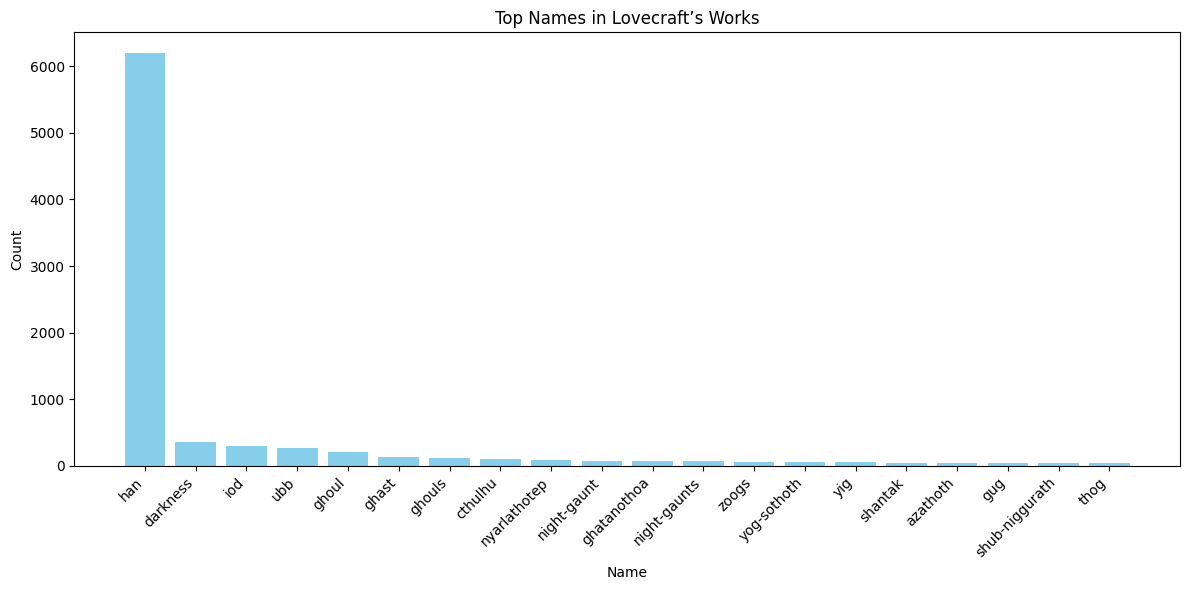

In [6]:
import matplotlib.pyplot as plt

# Set a limit for how many names to display for better visualization
top_n = 20  # Change this number to see more or fewer names
top_names = name_counts_df.nlargest(top_n, 'Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_names['Name'], top_names['Count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top Names in Lovecraft’s Works')
plt.xlabel('Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [7]:
# Save the name counts to a new CSV file
name_counts_df.to_csv('data/lovecraft_name_counts.csv', index=False)


In [8]:
import pandas as pd
import json
import re

# Load the CSV file
lovecraft_df = pd.read_csv('data/lovecraft_fiction.csv')

# Example function to clean and preprocess text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Apply cleaning to the 'Text' column
lovecraft_df['Cleaned_Text'] = lovecraft_df['Text'].apply(clean_text)


In [9]:
# Load the name counts CSV
name_counts_df = pd.read_csv('data/lovecraft_name_counts.csv')

# Clean the names
name_counts_df['Cleaned_Name'] = name_counts_df['Name'].str.lower().str.strip()


In [10]:
# Count occurrences in the cleaned text
name_occurrences = lovecraft_df['Cleaned_Text'].str.cat(sep=' ').split()
name_count_dict = {name: name_occurrences.count(name) for name in name_counts_df['Cleaned_Name']}

# Update the counts in the DataFrame
name_counts_df['Updated_Count'] = name_counts_df['Cleaned_Name'].map(name_count_dict).fillna(0).astype(int)

# Save the updated counts to a new CSV
name_counts_df.to_csv('data/updated_lovecraft_name_counts.csv', index=False)


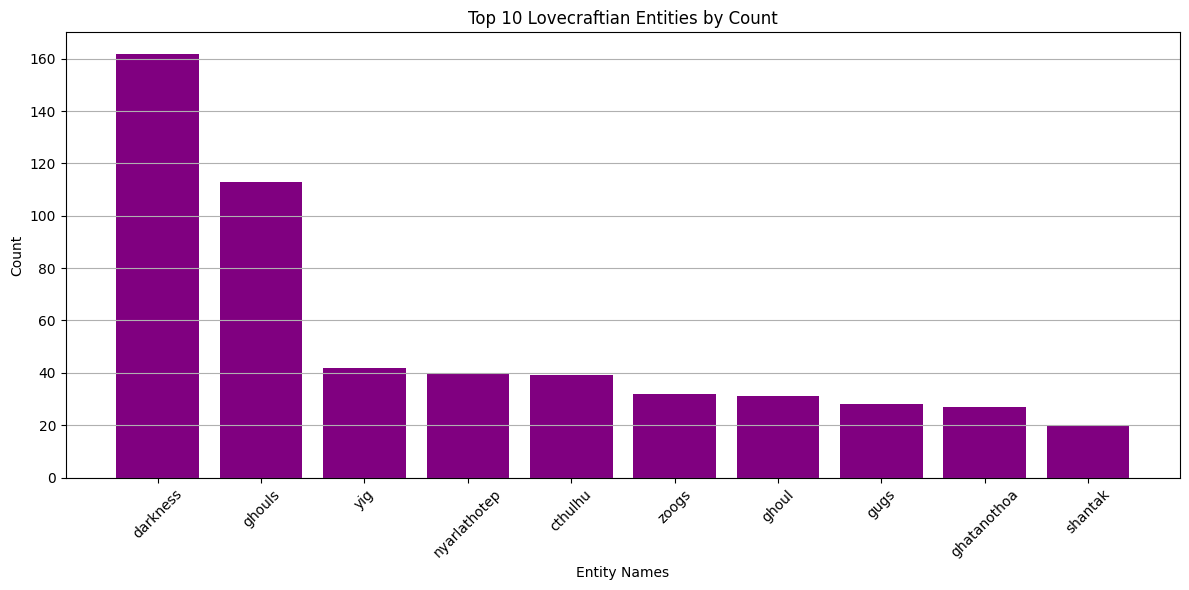

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated counts CSV
updated_name_counts_df = pd.read_csv('data/updated_lovecraft_name_counts.csv')

# Select top 10 entities by count
top_entities = updated_name_counts_df.nlargest(10, 'Updated_Count')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_entities['Cleaned_Name'], top_entities['Updated_Count'], color='purple')
plt.title('Top 10 Lovecraftian Entities by Count')
plt.xlabel('Entity Names')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


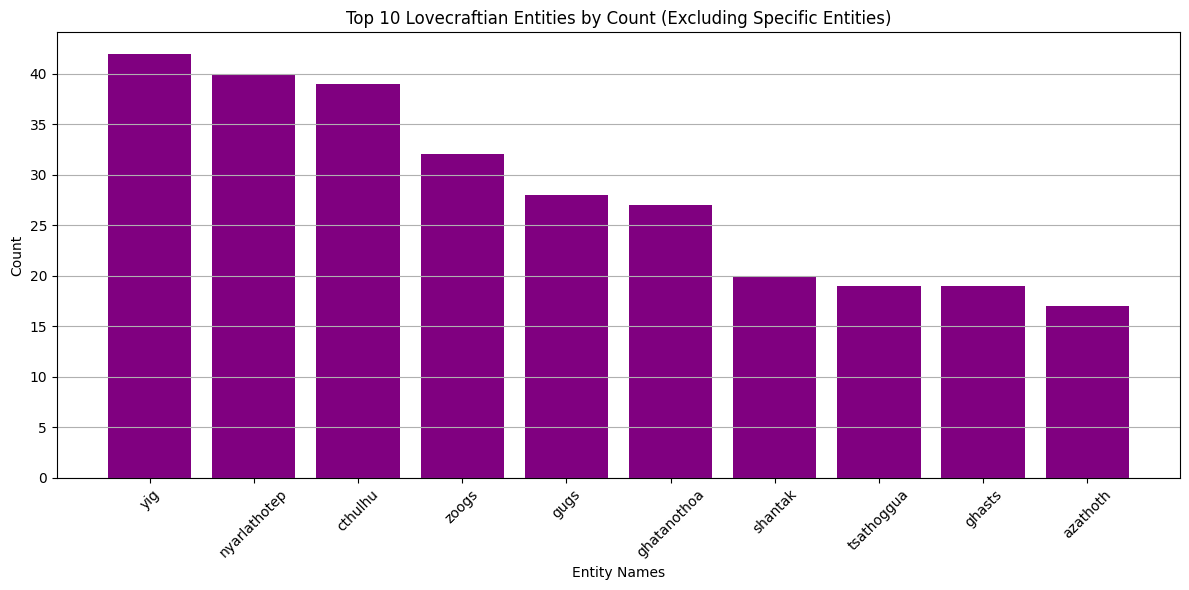

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated counts CSV
updated_name_counts_df = pd.read_csv('data/updated_lovecraft_name_counts.csv')

# Filter out specific entities
entities_to_exclude = ['darkness', 'ghoul', 'ghouls']
filtered_df = updated_name_counts_df[~updated_name_counts_df['Cleaned_Name'].str.lower().isin(entities_to_exclude)]

# Select top 10 entities by count
top_entities = filtered_df.nlargest(10, 'Updated_Count')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_entities['Cleaned_Name'], top_entities['Updated_Count'], color='purple')
plt.title('Top 10 Lovecraftian Entities by Count (Excluding Specific Entities)')
plt.xlabel('Entity Names')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
import nltk

nltk.download('punkt', download_dir='C:\\Users\\Marc Jay\\nltk_data')  # Adjust the path as needed


[nltk_data] Downloading package punkt to C:\Users\Marc
[nltk_data]     Jay\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import nltk

nltk.download('punkt', download_dir='C:\\Users\\Marc Jay\\nltk_data')  # Adjust path as needed
nltk.download('punkt_tab', download_dir='C:\\Users\\Marc Jay\\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\Marc
[nltk_data]     Jay\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Marc
[nltk_data]     Jay\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize

# Ensure that 'punkt' is downloaded
nltk.download('punkt')

# Load the data from the CSV file
df = pd.read_csv('data/lovecraft_fiction.csv')

# Initialize a list to store the entities
entities = []

# Extract names and descriptions from the DataFrame
for index, row in df.iterrows():
    entity = {
        'name': row['Title'],
        'description': row['Text'],
    }
    entities.append(entity)

# Preprocessing the extracted data
for entity in entities:
    entity['name'] = entity['name'].lower()
    entity['description'] = entity['description'].lower()
    entity['description'] = re.sub(r'[^a-zA-Z0-9\s]', '', entity['description'])
    entity['tokens'] = word_tokenize(entity['description'])

# Convert it back to a DataFrame for further analysis
processed_df = pd.DataFrame(entities)

# Save the processed data to a new CSV file
processed_df.to_csv('data/lovecraft_processed_entities.csv', index=False)

# Print the processed DataFrame
print(processed_df.head())


[nltk_data] Downloading package punkt to C:\Users\Marc
[nltk_data]     Jay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                name  \
0  the alchemistby h. p. lovecraft by by h. p. lo...   
1  ashesby c. m. eddy, jr.with h. p. lovecraft by...   
2  at the mountains of madnessby h. p. lovecraft ...   
3   azathothby h. p. lovecraft by by h. p. lovecraft   
4  the battle that ended the century(ms. found in...   

                                         description  \
0  high up crowning the grassy summit of a swelli...   
1  hello bruce havent seen you in a dogs age come...   
2  ii am forced into speech because men of scienc...   
3  when age fell upon the world and wonder went o...   
4  note barlows contributions are in bracketson t...   

                                              tokens  
0  [high, up, crowning, the, grassy, summit, of, ...  
1  [hello, bruce, havent, seen, you, in, a, dogs,...  
2  [ii, am, forced, into, speech, because, men, o...  
3  [when, age, fell, upon, the, world, and, wonde...  
4  [note, barlows, contributions, are, in, bracke..

In [16]:
import pandas as pd
import json

# Load creatures data
with open('data/creatures.json') as f:
    creatures_data = json.load(f)

# Load races data
with open('data/races.json') as f:
    races_data = json.load(f)

# Create DataFrame for creatures
creatures_df = pd.DataFrame(creatures_data)

# Create DataFrame for races
races_df = pd.DataFrame(races_data)

# Display DataFrames
print(creatures_df.head())
print(races_df.head())


                      author                    canon       category  id  \
0  Howard Phillips Lovecraft  Lovecraft's Myths Cycle  great old one   1   
1         Clark Ashton Smith       Lovecraft's Circle      outer god   2   
2            Crispin Burnham  Expanded Cthulhu Mythos  great old one   3   
3         Clark Ashton Smith       Lovecraft's Circle  great old one   4   
4  Howard Phillips Lovecraft  Lovecraft's Myths Cycle  great old one   5   

                                                 img            name  \
0  [https://lovecraftapirest.fly.dev/api/images/'...  'umr at-tawill   
1  [https://lovecraftapirest.fly.dev/api/images/a...          abhoth   
2  [https://lovecraftapirest.fly.dev/api/images/a...    apocolothoth   
3  [https://lovecraftapirest.fly.dev/api/images/a...   atlach-natcha   
4  [https://lovecraftapirest.fly.dev/api/images/a...        azathoth   

                                               nicks  \
0  [the most ancient one, the guide, the prolonge...  

In [17]:
import pandas as pd
from collections import Counter

# Load the CSV file
df = pd.read_csv('data/lovecraft_processed_entities.csv')

# Assuming the tokens are in a column named 'tokens'
# If the tokens are in a different column, adjust accordingly
tokens = df['tokens'].explode().tolist()

# Count the frequency of each token
token_counts = Counter(tokens)

# Display the most common tokens
most_common_tokens = token_counts.most_common(10)  # Adjust the number as needed
print(most_common_tokens)


[("['high', 'up', 'crowning', 'the', 'grassy', 'summit', 'of', 'a', 'swelling', 'mound', 'whose', 'sides', 'are', 'wooded', 'near', 'the', 'base', 'with', 'the', 'gnarled', 'trees', 'of', 'the', 'primeval', 'forest', 'stands', 'the', 'old', 'chateau', 'of', 'my', 'ancestors', 'for', 'centuries', 'its', 'lofty', 'battlements', 'have', 'frowned', 'down', 'upon', 'the', 'wild', 'and', 'rugged', 'countryside', 'about', 'serving', 'as', 'a', 'home', 'and', 'stronghold', 'for', 'the', 'proud', 'house', 'whose', 'honoured', 'line', 'is', 'older', 'even', 'than', 'the', 'mossgrown', 'castle', 'walls', 'these', 'ancient', 'turrets', 'stained', 'by', 'the', 'storms', 'of', 'generations', 'and', 'crumbling', 'under', 'the', 'slow', 'yet', 'mighty', 'pressure', 'of', 'time', 'formed', 'in', 'the', 'ages', 'of', 'feudalism', 'one', 'of', 'the', 'most', 'dreaded', 'and', 'formidable', 'fortresses', 'in', 'all', 'france', 'from', 'its', 'machicolated', 'parapets', 'and', 'mounted', 'battlements', 'ba

In [18]:
import pandas as pd

# Convert the token counts dictionary to a DataFrame
token_counts_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Frequency'])

# Save to CSV
token_counts_df.to_csv('lovecraft_token_frequencies.csv', index=False)


In [19]:
import pandas as pd

# Load the CSV file
token_counts_df = pd.read_csv('lovecraft_token_frequencies.csv')

# Display the DataFrame
print(token_counts_df.head())


                                               Token  Frequency
0  ['high', 'up', 'crowning', 'the', 'grassy', 's...          1
1  ['hello', 'bruce', 'havent', 'seen', 'you', 'i...          1
2  ['ii', 'am', 'forced', 'into', 'speech', 'beca...          1
3  ['when', 'age', 'fell', 'upon', 'the', 'world'...          1
4  ['note', 'barlows', 'contributions', 'are', 'i...          1


In [20]:
# Sort by frequency
sorted_tokens = token_counts_df.sort_values(by='Frequency', ascending=False)

# Display the top 20 tokens
print(sorted_tokens.head(20))


                                                Token  Frequency
0   ['high', 'up', 'crowning', 'the', 'grassy', 's...          1
1   ['hello', 'bruce', 'havent', 'seen', 'you', 'i...          1
2   ['ii', 'am', 'forced', 'into', 'speech', 'beca...          1
3   ['when', 'age', 'fell', 'upon', 'the', 'world'...          1
4   ['note', 'barlows', 'contributions', 'are', 'i...          1
5   ['the', 'horrible', 'conclusion', 'which', 'ha...          1
6   ['i', 'have', 'an', 'exposition', 'of', 'sleep...          1
7   ['my', 'memories', 'are', 'very', 'confused', ...          1
8   ['found', 'among', 'the', 'papers', 'of', 'the...          1
9   ['the', 'essential', 'saltes', 'of', 'animals'...          1
10  ['it', 'is', 'said', 'that', 'in', 'ulthar', '...          1
11  ['in', 'a', 'dream', 'kuranes', 'saw', 'the', ...          1
12  ['cl', 'mooregeorge', 'campbell', 'opened', 's...          1
13  ['note', 'barlows', 'contributions', 'are', 'i...          1
14  ['west', 'of', 'arkha